# Image Classification Using Machine Learning
### Name: Lebelo Hailesilassie

## Overview


In this assignment images were labeled into five classes. Those are classes of 0,2,4,6, and 9 in which the classes labeling was taken from the names of the image folder in which the images were stored. Manually checking and classifying images could be a tedious task especially when they are massive in number and therefore it will be very useful if we could automate this entire process using computer vision. The work below aims to put fundamental principles machine learning.

# Setup
Import all necessary libraries:

In [107]:
import numpy as np
import pandas as pd
import os
import io
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import warnings
warnings.filterwarnings("ignore")
#!pip install tensorflow

In [108]:
# Get my current working directory:
os.getcwd()

'/Users/lebelotigraway/Desktop/GitHub/imageclassification'

### Image Pre-Processing
Reading Image

In [109]:
from PIL import Image
import os

# Define the path to the image folder
image_folder = '/Users/lebelotigraway/Desktop/GitHub/imageclassification/images/0'

# Initialize a counter for the number of image files
num_images = 0

# Loop through all the files in the image folder
for filename in os.listdir(image_folder):
    # Check if the file is an image
    if filename.endswith('.TIF'):
        # Increment the counter
        num_images+=1
        # Load the image
        image_path=os.path.join(image_folder,filename)
        #image = Image.open(image_path)
# Print the number of image files in the folder
print("Number of images in the folder:", num_images)

# Check if there are 500 images
if num_images == 500:
    print("There are 500 images in the folder")
else:
    print("There are not 500 images in the folder")

Number of images in the folder: 500
There are 500 images in the folder


In [110]:
def process_directory(path, width=28, height=28):
    # Initialize a list to store the data for the DataFrame
    data = []

    # Loop over all the files in the directory
    for filename in os.listdir(path):

        # Check if the file is a .tif file
        if filename.endswith(".TIF"):

            # Load the image using Pillow
            img = Image.open(os.path.join(path, filename))
            # Resize the image
            img = img.resize((width, height))
            # Convert image to numpy array
            img_np = np.array(img)

            # Convert image to floats
            img_float = img_np.astype(np.float32)

            # Add the image data to the list
            data.append({'image_name': filename, 'class': path.split('/')[-1], 'label': path.split('/')[-1]})

    # Create the DataFrame with index and column names
    df = pd.DataFrame(data, columns=['image_name', 'class', 'label'], index=range(1, len(data)+1))
    return df

# Dataset Acquisition for Training and Testing



#### Resize and Reshape into 2D array

 Image classification using machine learning algorithms from sklearn
requires reshaping the images of the dataset to a two-dimensional array.
This is because sklearn expects a 2D array as input to the fit() function
which will be called on the model during training.
Because the model that is going to be used will be trained with 2-D array input shape, the images needs to be resized into their width and height specifications.

In [111]:
# Define the width and height to resize the image
width=28
height=28
# Define the path to the image in folders
f_0='/Users/lebelotigraway/Desktop/GitHub/imageclassification/images/0'
f_2='/Users/lebelotigraway/Desktop/GitHub/imageclassification/images/2'
f_4='/Users/lebelotigraway/Desktop/GitHub/imageclassification/images/4'
f_6='/Users/lebelotigraway/Desktop/GitHub/imageclassification/images/6'
f_9='/Users/lebelotigraway/Desktop/GitHub/imageclassification/images/9'
# Define Feature and Target
X=[]
y=[]
for folder_path, label in [(f_0,0),(f_2,2),(f_4,4),(f_6,6),(f_9,9)]:
    for filename in os.listdir(folder_path):
        if filename.endswith('.TIF'):
            image_path=os.path.join(folder_path,filename)
            img=Image.open(image_path)
            img=img.resize((width,height))
            img_arr=np.array(img)
            X.append(img_arr)
            y.append(label)

#####  Feature and Label Extraction

In [112]:
# Extract Feature
X=np.array(X)
X=X.reshape(-1,width,height,1)
# Extract label or target
y=np.array(y)
y=y.reshape(-1,1)
# print shape 
print(X.shape)
print(y.shape)

(2500, 28, 28, 1)
(2500, 1)


##### Split Dataset into Training and Testing

In [113]:
# Split the data into training and testing sets, with 80% for training and 20% for testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
# print the shapes of the resulting datasets:
print('X_train shape:',X_train.shape)
print('y_train shape:',y_train.shape)
print('X_test shape:',X_test.shape)
print('y_test shape:',y_test.shape)

X_train shape: (2000, 28, 28, 1)
y_train shape: (2000, 1)
X_test shape: (500, 28, 28, 1)
y_test shape: (500, 1)


#### Passing Stratify=y

 Passing the 'target(y)' as the stratify parameter, 'train_test_split'will ensure that the class distribution is maintained in both the training and testing sets.

#### Normalization & Reshape

 Normalization is an important step of image pre-processing by dividing 
both training and testing set of the feature by 255. This ensures the pixels of all
the images are mainained within a uniform range.

In [114]:
# Normalization
X_train=X_train/255.0
X_test=X_test/255.0

In [115]:
# Reshape X_train and X_test back to 2D
X_train2 = X_train.reshape(X_train.shape[0], -1)
X_test2 = X_test.reshape(X_test.shape[0], -1)

# Implementing top noch Classifiers to Classify the class of an image

#### 1. Random Forest Classifier
A common problem with decision trees is that they tend to fit the training data too closely(i.e overfitting). This has motivated the widespread use of an ensemble learning method called random forest. In a random forest, many decision trees are trained,but each tree only receives a bootstrapped sample of observation(i. e a random sample of observations with replacement that matches the original number of observation) and each node only considers a subset of features when determining the best split. This forest of randomized decison trees votes to determine the predicted class of each image from the scanned documents.Parameters used in this classifier are the defualt.


In [116]:
# import RandomForest Classifier:
from sklearn.ensemble import RandomForestClassifier
# Ceate an instance of the RandomForestClassifier class:
rf=RandomForestClassifier()
# fit and train model using training sets
rf.fit(X_train2,y_train)
# predict the test set using the fitted RandomForest model
y_pred_rf=rf.predict(X_test2)

#### 2. Decision Tree
Tree-based learning algorithms are a broad and popular family of related non-parametric, supervised methods for both classification and regression. One reason for the popularity of tree-based models is their interpretability.

In [117]:
# import DecisionTree Classifier
from sklearn.tree import DecisionTreeClassifier
# Create and instance of the DecisionTreeClassifier
dt=DecisionTreeClassifier()
# fit and train model using training sets
dt.fit(X_train2,y_train)
# predict the test set using the fitted DecisionTree model
y_pred_dt=dt.predict(X_test2)

#### 3. K-Nearest Neighbours 
The K-Nearest Neighbors classifier(KNN) is one of the simplest and yet commonly used classifiers in supervised machine learning. This classifier does not technically train a model to make predictions. Instead an observation is predicted to be the class of that of the largest proportion of the k nearest observations. For example, if an observation with an unknown class is surrounded by an observation of class 0 (the first class in our data set), then the observation is classified as class 0.

In [118]:
# import KNeighborsClassifier class
from sklearn.neighbors import KNeighborsClassifier
# create and instance of KNeighbors of '7' folds, 5 is the defualt
knn=KNeighborsClassifier(n_neighbors=7)
# fit and train model using training sets
knn.fit(X_train2,y_train)
# predict the test set using the fitted knn model
y_pred_knn=knn.predict(X_test2)

#### 4. Naive Bayes  
In naive Bayes, we compare an observation's posterior values for each possible class. Because the marginal probability is constant across these comparisons, we compare the numerators of the posyerior for each class.

In [119]:
# import KNeighborsClassifier class
from sklearn.naive_bayes import GaussianNB
# create and instance of NB model
nb=GaussianNB()
# fit and train model using training sets
nb.fit(X_train2,y_train)
# predict the test set using the fitted knn model
y_pred_nb=nb.predict(X_test2)

# Evaluating Multiclass Classifier Prediction
The models above were created and trained to predict five(5) classes namely class 0, class 2, class 4, class 6 and class 9. Classes name is from the name of the images folder.
Metrics used to evaluate the model performance to identify the classification of the images are precision,recall, accuracy, F1, and confusion matrix.

#### import Performance Measures Metrics

In [120]:
from sklearn.metrics import confusion_matrix,classification_report

#### 1. Random Forest Classifier Model Performance 


##### Classification Report(Precision, Recall F1- Score)

In [121]:
# Generate classification report
rf_model_performance=classification_report(y_pred_rf,y_test,output_dict=True)
# Convert Classification report to dataframe
rf_model_performance_df =pd.DataFrame(rf_model_performance).T
rf_model_performance_df

,precision,recall,f1-score,support
0,0.80000,0.714286,0.754717,112.000
2,0.90000,0.882353,0.891089,102.000
4,0.70000,0.804598,0.748663,87.000
6,0.69000,0.633028,0.660287,109.000
9,0.55000,0.611111,0.578947,90.000
accuracy,0.72800,0.728000,0.728000,0.728
macro avg,0.72800,0.729075,0.726741,500.000
weighted avg,0.73402,0.728000,0.729259,500.000


Macro : Calculates the mean of metric scores for each class, weighting each class equally.
Weighted: Calculate mean of metric scores for each class, weighting each class proportional to its size in the data.

##### Confusion Matrix
Confusion matrix compares predicted classes and true classes. One of the major benefits of comfusion matrices is their interpretability. Each column of the matrix (often visualized as a heatmap) represents the predicted classes, while every row shows true classes. The end result is that every cell is one possible combination of predict and true classes.

In [122]:
# Compute confusion matrix
rf_cm=confusion_matrix(y_pred_rf,y_test)
#Convert to dataframe
target_classes = ['0', '2', '4', '6', '9']
rf_cm_df=pd.DataFrame(rf_cm,index=target_classes,columns=target_classes)
rf_cm_df

,0,2,4,6,9
0,80,4,10,9,9
2,3,90,0,5,4
4,4,1,70,1,11
6,8,4,7,69,21
9,5,1,13,16,55


##### Visualze Confusion Matrix Using Heatmap

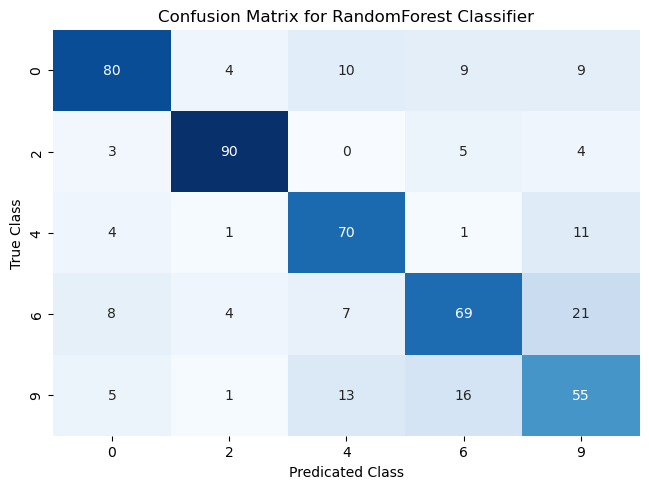

In [123]:
#create heatmap for better visualization
sns.heatmap(rf_cm_df,annot=True,cbar=None,cmap='Blues')
plt.title('Confusion Matrix for RandomForest Classifier'),plt.tight_layout()
plt.ylabel('True Class'),plt.xlabel('Predicated Class')
plt.show()

RandomForest Classifier Heatmpa analysis:


A perfect model will have values along the diagonal and zeros everywhere else. A bad model will look like the observation counts will be spread evenly around cells.
The random forest classifier model is not perfect but it is not bad either. The model was able to predict 88% of class 2 correctly and 59% class 9, which is the lowest socre. That means this model had relatively an easy time differentating class o and class 2, but relatively much more difficult time classifying class 9.

#### 2. Decision Tree

##### Classification Report(Precision, Recall F1- Score

In [124]:
# Generate classification report
dt_model_performance=classification_report(y_pred_dt,y_test,output_dict=True)
# Convert Classification report to dataframe
dt_model_performance_df =pd.DataFrame(dt_model_performance).T
dt_model_performance_df

,precision,recall,f1-score,support
0,0.57000,0.548077,0.558824,104.00
2,0.86000,0.819048,0.839024,105.00
4,0.52000,0.597701,0.556150,87.00
6,0.49000,0.445455,0.466667,110.00
9,0.51000,0.542553,0.525773,94.00
accuracy,0.59000,0.590000,0.590000,0.59
macro avg,0.59000,0.590567,0.589288,500.00
weighted avg,0.59332,0.590000,0.590712,500.00


##### Confusion Matrix
Confusion matrix compares predicted classes and true classes

In [125]:
# Compute confusion matrix
dt_cm=confusion_matrix(y_pred_dt,y_test)
#Convert to dataframe
target_classes = ['0', '2', '4', '6', '9']
dt_cm_df=pd.DataFrame(dt_cm,index=target_classes,columns=target_classes)
dt_cm_df

,0,2,4,6,9
0,57,7,10,17,13
2,7,86,6,3,3
4,11,2,52,10,12
6,18,2,20,49,21
9,7,3,12,21,51


##### Visualze Confusion Matrix Using Heatmap

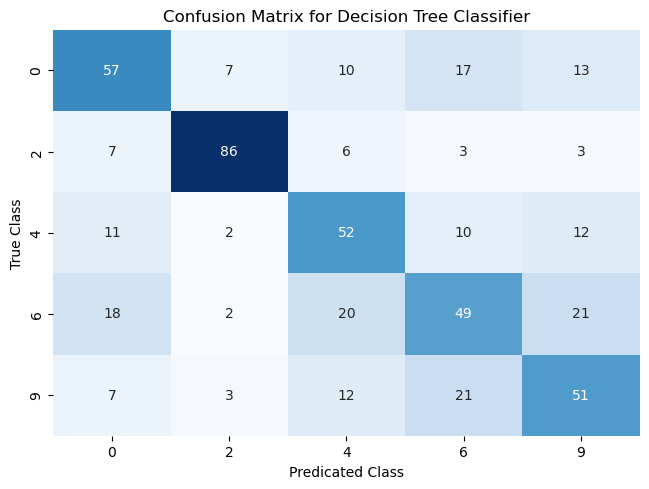

In [126]:
#create heatmap for better visualization
sns.heatmap(dt_cm_df,annot=True,cbar=None,cmap='Blues')
plt.title('Confusion Matrix for Decision Tree Classifier'),plt.tight_layout()
plt.ylabel('True Class'),plt.xlabel('Predicated Class')
plt.show()

Decision Tree Classifier Heatmpa analysis:
    
Like the Random Forest classifier model, the decison tree model seems to havee an easier time differentiating predicting class 2 but much more difficult with classifying all most all the classes or worst in classifying class 4 and class 6, both were <50%.


##### 3. K-Nearest Neighbours

##### Classification Report(Precision, Recall F1- Score¶

In [127]:
# Generate classification report
knn_model_performance=classification_report(y_pred_knn,y_test,output_dict=True)
# Convert Classification report to dataframe
knn_model_performance_df =pd.DataFrame(knn_model_performance).T
knn_model_performance_df

,precision,recall,f1-score,support
0,0.76000,0.723810,0.741463,105.000
2,0.92000,0.760331,0.832579,121.000
4,0.50000,0.847458,0.628931,59.000
6,0.77000,0.546099,0.639004,141.000
9,0.41000,0.554054,0.471264,74.000
accuracy,0.67200,0.672000,0.672000,0.672
macro avg,0.67200,0.686350,0.662648,500.000
weighted avg,0.71906,0.672000,0.681352,500.000


##### Confusion Matrix¶
Confusion matrix compares predicted classes and true classes

In [128]:
# Compute confusion matrix
knn_cm=confusion_matrix(y_pred_knn,y_test)
#Convert to dataframe
target_classes = ['0', '2', '4', '6', '9']
knn_cm_df=pd.DataFrame(knn_cm,index=target_classes,columns=target_classes)
knn_cm_df

,0,2,4,6,9
0,76,3,5,8,13
2,11,92,6,7,5
4,2,0,50,2,5
6,9,3,16,77,36
9,2,2,23,6,41


##### Visualze Confusion Matrix Using Heatmap

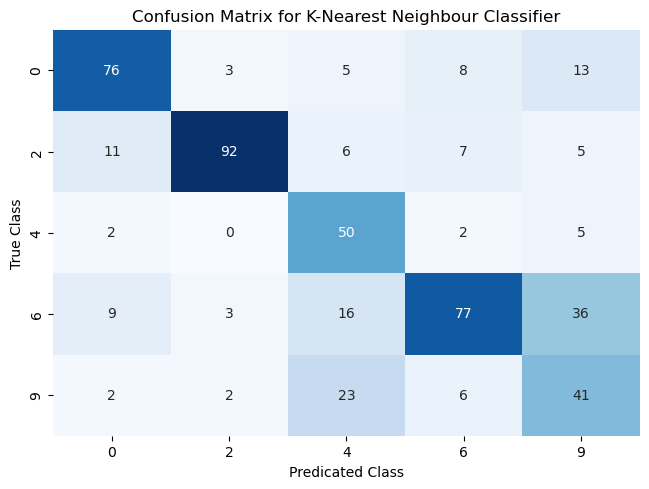

In [129]:
#create heatmap for better visualization
sns.heatmap(knn_cm_df,annot=True,cbar=None,cmap='Blues')
plt.title('Confusion Matrix for K-Nearest Neighbour Classifier'),plt.tight_layout()
plt.ylabel('True Class'),plt.xlabel('Predicated Class')
plt.show()

KNN Classifier Heatmpa analysis:

KNN classifier predicts class 2 at 92% which is the highest score by any of the models considered in this analysis. This model seems to do well classifying most of the classes except for class 9(41) and class 4(50). By now it is safe to say all the models are having difficult time classifying class 9.

##### 4. Naive Bayes

##### Classification Report(Precision, Recall F1- Score¶

In [130]:
# Generate classification report
nb_model_performance=classification_report(y_pred_nb,y_test,output_dict=True)
# Convert Classification report to dataframe
nb_model_performance_df =pd.DataFrame(nb_model_performance).T
nb_model_performance_df

,precision,recall,f1-score,support
0,0.5600,0.427481,0.484848,131.00
2,0.9000,0.584416,0.708661,154.00
4,0.6200,0.815789,0.704545,76.00
6,0.1800,0.620690,0.279070,29.00
9,0.5400,0.490909,0.514286,110.00
accuracy,0.5600,0.560000,0.560000,0.56
macro avg,0.5600,0.587857,0.538282,500.00
weighted avg,0.6474,0.560000,0.581718,500.00


##### Confusion Matrix¶¶
Confusion matrix compares predicted classes and true classes

In [131]:
# Compute confusion matrix
nb_cm=confusion_matrix(y_pred_nb,y_test)
#Convert to dataframe
target_classes = ['0', '2', '4', '6', '9']
nb_cm_df=pd.DataFrame(nb_cm,index=target_classes,columns=target_classes)
nb_cm_df

,0,2,4,6,9
0,56,8,8,38,21
2,35,90,5,14,10
4,1,0,62,4,9
6,0,0,5,18,6
9,8,2,20,26,54


##### Visualze Confusion Matrix Using Heatmap

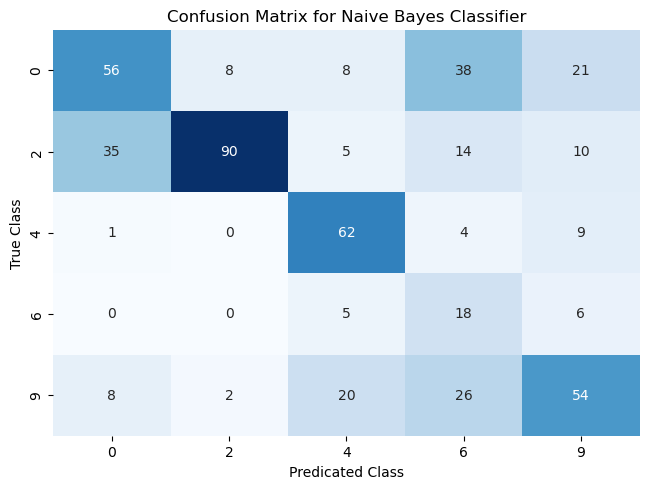

In [132]:
#create heatmap for better visualization
sns.heatmap(nb_cm_df,annot=True,cbar=None,cmap='Blues')
plt.title('Confusion Matrix for Naive Bayes Classifier'),plt.tight_layout()
plt.ylabel('True Class'),plt.xlabel('Predicated Class')
plt.show()

Naive Bayes Classifier Heatmpa analysis:


Naive Bayes classifier is more or less similar to KNN. They both had easy time classifying class 2 (>90). This model had worst time of classifying class 6 (18) which is the lowest by any model in this context.
Overall, though some models were able to classify specific class at higher percentage (class 2), I think Random Forest classifier is the best model to work with this image classification while Naive Bayes is the worst.

# Results

##### Accuracy Score Comparison

In [133]:
 # Generate accuracy score for each plot
from sklearn.metrics import accuracy_score
rf_accuracy=accuracy_score(y_pred_rf,y_test)
dt_accuracy=accuracy_score(y_pred_dt,y_test)
knn_accuracy=accuracy_score(y_pred_knn,y_test)
nb_accuracy=accuracy_score(y_pred_nb,y_test)

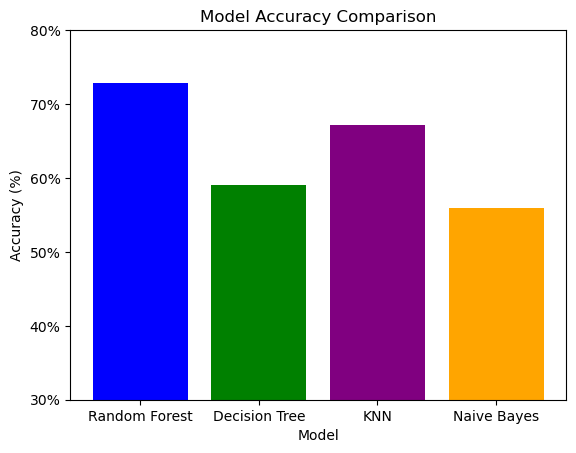

In [134]:
# Define the data
models = ['Random Forest', 'Decision Tree', 'KNN', 'Naive Bayes']
accuracies = [rf_accuracy, dt_accuracy, knn_accuracy, nb_accuracy]

# Create the bar chart
fig, ax = plt.subplots()
ax.bar(models, accuracies, color=['blue', 'green', 'purple', 'orange'])
ax.set(title='Model Accuracy Comparison', xlabel='Model', ylabel='Accuracy (%)')
ax.set_ylim([0.3, 0.8])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
# Save the figure
if not os.path.exists('figures'):
    os.makedirs('figures')
fig.savefig('figures/model_accuracies.png', dpi=300)
plt.show()

Accuracy Comparison Analysis:

The accuracies of the four ML algorithms that was just explored to classify the class of each images can be summarized using the graph shown above.
Random Forest Classifier shows the best performance with 74% accuracy followed by KNN with 67% accuracy, Decision Tree with 57% accuracy and NB with 56% accuracy. Thus, Random Forest exhibits the best peromance and NB the worst. This conclusion also aligns with the results from the confusion matrix heatmap.

##### Precision Score Comparison

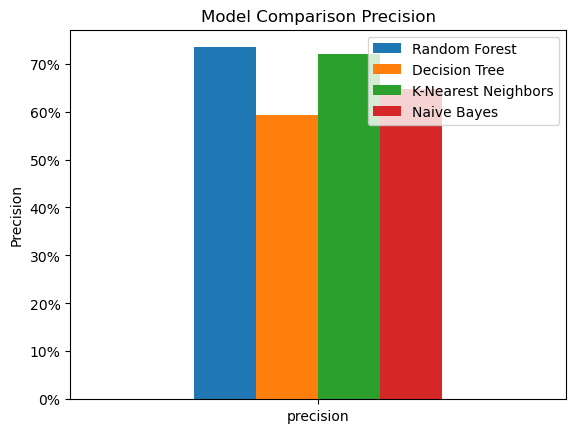

In [135]:
# Extract precision from each model's performance dataframe
rf_precision = rf_model_performance_df.loc['weighted avg', 'precision']
dt_precision = dt_model_performance_df.loc['weighted avg', 'precision']
knn_precision = knn_model_performance_df.loc['weighted avg', 'precision']
nb_precision = nb_model_performance_df.loc['weighted avg', 'precision']

# Create a dataframe for the precision of each model
model_comparison = pd.DataFrame({'Random Forest': rf_precision, 'Decision Tree': dt_precision,
                                 'K-Nearest Neighbors': knn_precision, 'Naive Bayes': nb_precision},
                                index=['precision'])

# Create the bar chart
fig, ax = plt.subplots()
model_comparison.plot(kind='bar', rot=0, ax=ax)
ax.set_title('Model Comparison Precision')
plt.ylabel('Precision')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))

# Save the figure
if not os.path.exists('figures'):
    os.makedirs('figures')
fig.savefig('figures/model_precisions.png', dpi=300)
plt.show()

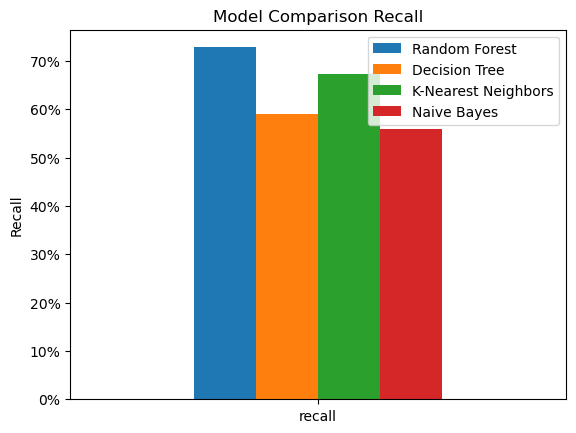

In [136]:
# Extract recall from each model's performance dataframe
rf_recall = rf_model_performance_df.loc['weighted avg', 'recall']
dt_recall = dt_model_performance_df.loc['weighted avg', 'recall']
knn_recall = knn_model_performance_df.loc['weighted avg', 'recall']
nb_recall = nb_model_performance_df.loc['weighted avg', 'recall']

# Create a dataframe for the recall of each model
model_comparison = pd.DataFrame({'Random Forest': rf_recall, 'Decision Tree': dt_recall,
                                 'K-Nearest Neighbors': knn_recall, 'Naive Bayes': nb_recall},
                                index=['recall'])

# Create the bar chart
fig, ax = plt.subplots()
model_comparison.plot(kind='bar', rot=0, ax=ax)
ax.set_title('Model Comparison Recall')
plt.ylabel('Recall')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))

# Save the figure
if not os.path.exists('figures'):
    os.makedirs('figures')
fig.savefig('figures/model_recall.png', dpi=300)
plt.show()

##### F1 Score Comparison

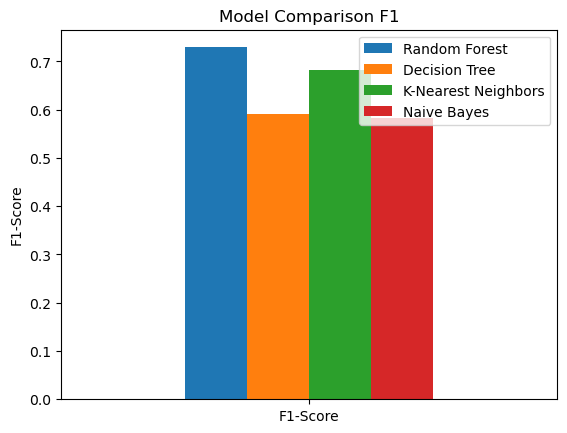

In [137]:
# Extract f1-score from each model's performance dataframe
rf_f1 = rf_model_performance_df.loc['weighted avg', 'f1-score']
dt_f1 = dt_model_performance_df.loc['weighted avg', 'f1-score']
knn_f1 = knn_model_performance_df.loc['weighted avg', 'f1-score']
nb_f1 = nb_model_performance_df.loc['weighted avg', 'f1-score']

# Create a dataframe for the f1-score of each model
model_comparison = pd.DataFrame({'Random Forest': rf_f1, 'Decision Tree': dt_f1,
                                 'K-Nearest Neighbors': knn_f1, 'Naive Bayes': nb_f1},
                                index=['F1-Score'])

# Plot a bar chart
model_comparison.plot(kind='bar', rot=0)
plt.title('Model Comparison F1')
plt.ylabel('F1-Score')

# Save the figure
if not os.path.exists('figures'):
    os.makedirs('figures')
plt.savefig('figures/model_f1.png', dpi=300)
plt.show()

# Conclusion
It conclusion, among all the four models used to classify the class of the images, RandomForest model exhibits the best performance and should be considered for the image classification given the model can be optimazed, fine tuned by changing all the parameters available in the sklearn libraries for the RandomForestClassifier().

# Appendix: Consolidate Trained Files

#### 1. Training and Testing Data 

In [138]:
# convert training and testing data into dataframe
X_train_df = pd.DataFrame(X_train.reshape(2000, -1))
y_train_df=pd.DataFrame(y_train,columns=['class'])
X_test_df = pd.DataFrame(X_test.reshape(500, -1))
y_test=pd.DataFrame(y_test,columns=['class'])
# Horizontally stack X_train and y_train
train_data = pd.concat([X_train_df, y_train_df], axis=1)
# Horizontally stack X_test and y_test
test_data = pd.concat([X_test_df, y_test], axis=1)
# Concatenate train and test dataframes vertically
all_data = pd.concat([train_data, test_data], axis=0, ignore_index=True)
# Create a Pandas Excel writer using XlsxWriter engine
writer = pd.ExcelWriter('all_data.xlsx', engine='xlsxwriter')
# Write each dataframe to a different sheet
train_data.to_excel(writer, sheet_name='Training Data', index=False)
test_data.to_excel(writer, sheet_name='Testing Data', index=False)

# Save the Excel file
writer.save()

#### 2. Predicted Data

In [139]:
# create dataframes for predicted values
rf_predicted = pd.DataFrame(y_pred_rf, columns=['Predicted Class RF'])
dt_predicted = pd.DataFrame(y_pred_dt, columns=['Predicted Class DT'])
knn_predicted = pd.DataFrame(y_pred_knn, columns=['Predicted Class KNN'])
nb_predicted = pd.DataFrame(y_pred_nb, columns=['Predicted Class NB'])

# concatenate horizontally
predicted_data = pd.concat([rf_predicted, dt_predicted, knn_predicted, nb_predicted], axis=1)

# save to Excel file with sheet names
with pd.ExcelWriter('predicted_values.xlsx') as writer:
    predicted_data.to_excel(writer, sheet_name='Predicted Values')

#### 3. Metrics Data

In [140]:
# create a Pandas Excel writer object
writer = pd.ExcelWriter('ModelPerformance.xlsx', engine='xlsxwriter')

# write dataframes to different sheets
rf_model_performance_df.to_excel(writer, sheet_name='Random Forest Model Performance')
dt_model_performance_df.to_excel(writer, sheet_name='Decision Tree Model Performance')
knn_model_performance_df.to_excel(writer, sheet_name='KNN Model Performance')
nb_model_performance_df.to_excel(writer, sheet_name='Naive Bayes Model Performance')

# save the excel file
writer.save()